This notebook is similar to [plot_results.ipynb](./plot_results.ipynb), except that it uses the [matplotlib basemap](https://matplotlib.org/basemap/) module to generate the plots. Hence all the details concerning the netCDF reading will not be repeated here.     
The [PyCall](https://github.com/JuliaPy/PyCall.jl) module allows us to call Python directly from Julia, in this case for loading basemap.

In [7]:
using NCDatasets  
using PyPlot
using PyCall
@pyimport mpl_toolkits.basemap as basemap

# Data reading

In [8]:
datadir = "./"
datafile = joinpath(datadir, "Water_body_Salinity.4Danl.nc")
if isfile(datafile)
    info("File exists") 
else
    error("File does not exist")
end

INFO: File exists


## NetCDF reading

In [9]:
info("Reading dataset")
ds = Dataset(datafile)
lon = ds["lon"];
lat = ds["lat"];
depth = ds["depth"];
ttime = ds["time"];
salinity = ds["Salinity"];

INFO: Reading dataset


## Depth and period selection

In [11]:
depthplot = 20.;
timeindex = 4;
depthindex = find(depth .== depthplot)[1];
salinityplot = salinity[:, :, depthindex, timeindex];
salinityplot = salinityplot.data;

# Creation of plots
## Setup map projection
We setup a Mercator projection on the region defined by longitude and latitude.

In [12]:
map = basemap.Basemap(llcrnrlon=minimum(lon), llcrnrlat=minimum(lat),
    urcrnrlon=maximum(lon), urcrnrlat=maximum(lat),
    resolution="i", projection="merc")

PyObject <mpl_toolkits.basemap.Basemap object at 0x7f68496d9a50>

To check if everything is ok so far, let's represent the coastline and the land-sea mask.     
You should obtain a map centered on the Black Sea with the land-sea mask in grey color.

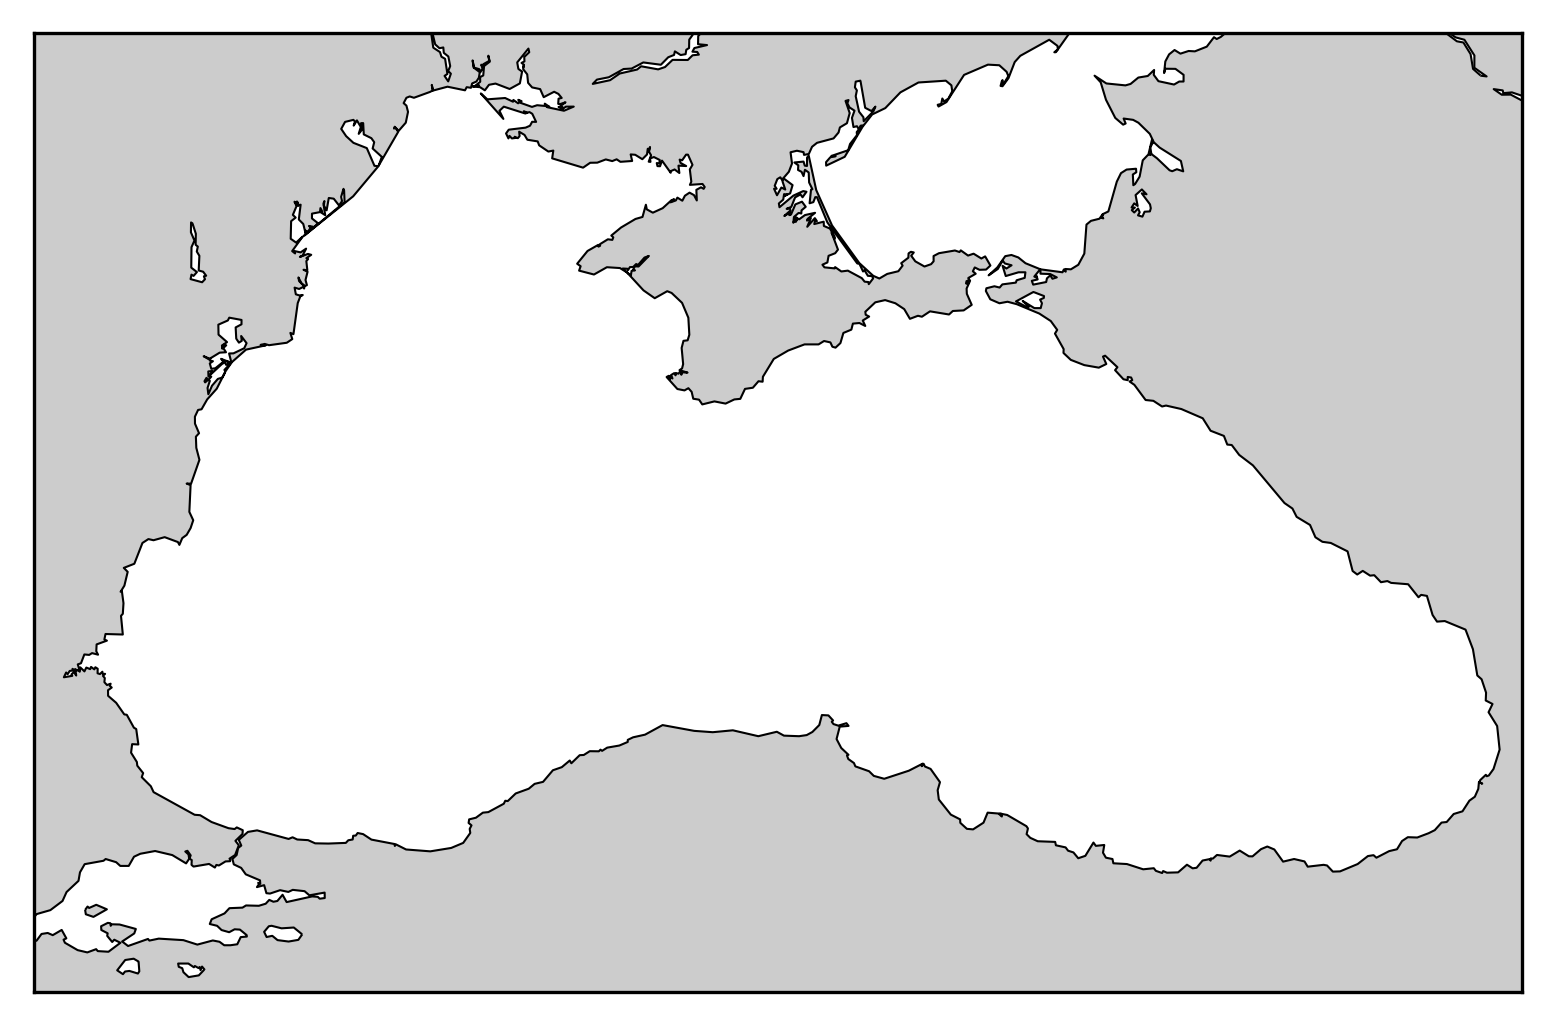

In [14]:
map[:drawcoastlines](linewidth=0.5);
map[:fillcontinents]();

## Add salinity pseudo-color plot

Convert the vectors to 2D grids:

In [16]:
longrid, latgrid = repmat(lon', length(lat), 1), repmat(lat, 1, length(lon));

Remove the fill values:

In [18]:
fill_value = salinity.attrib["_FillValue"]
salinityplot[salinityplot .== fill_value] = NaN;

We can now use all of the [`matplotlib basemap`](https://matplotlib.org/basemap/) functions, for example:

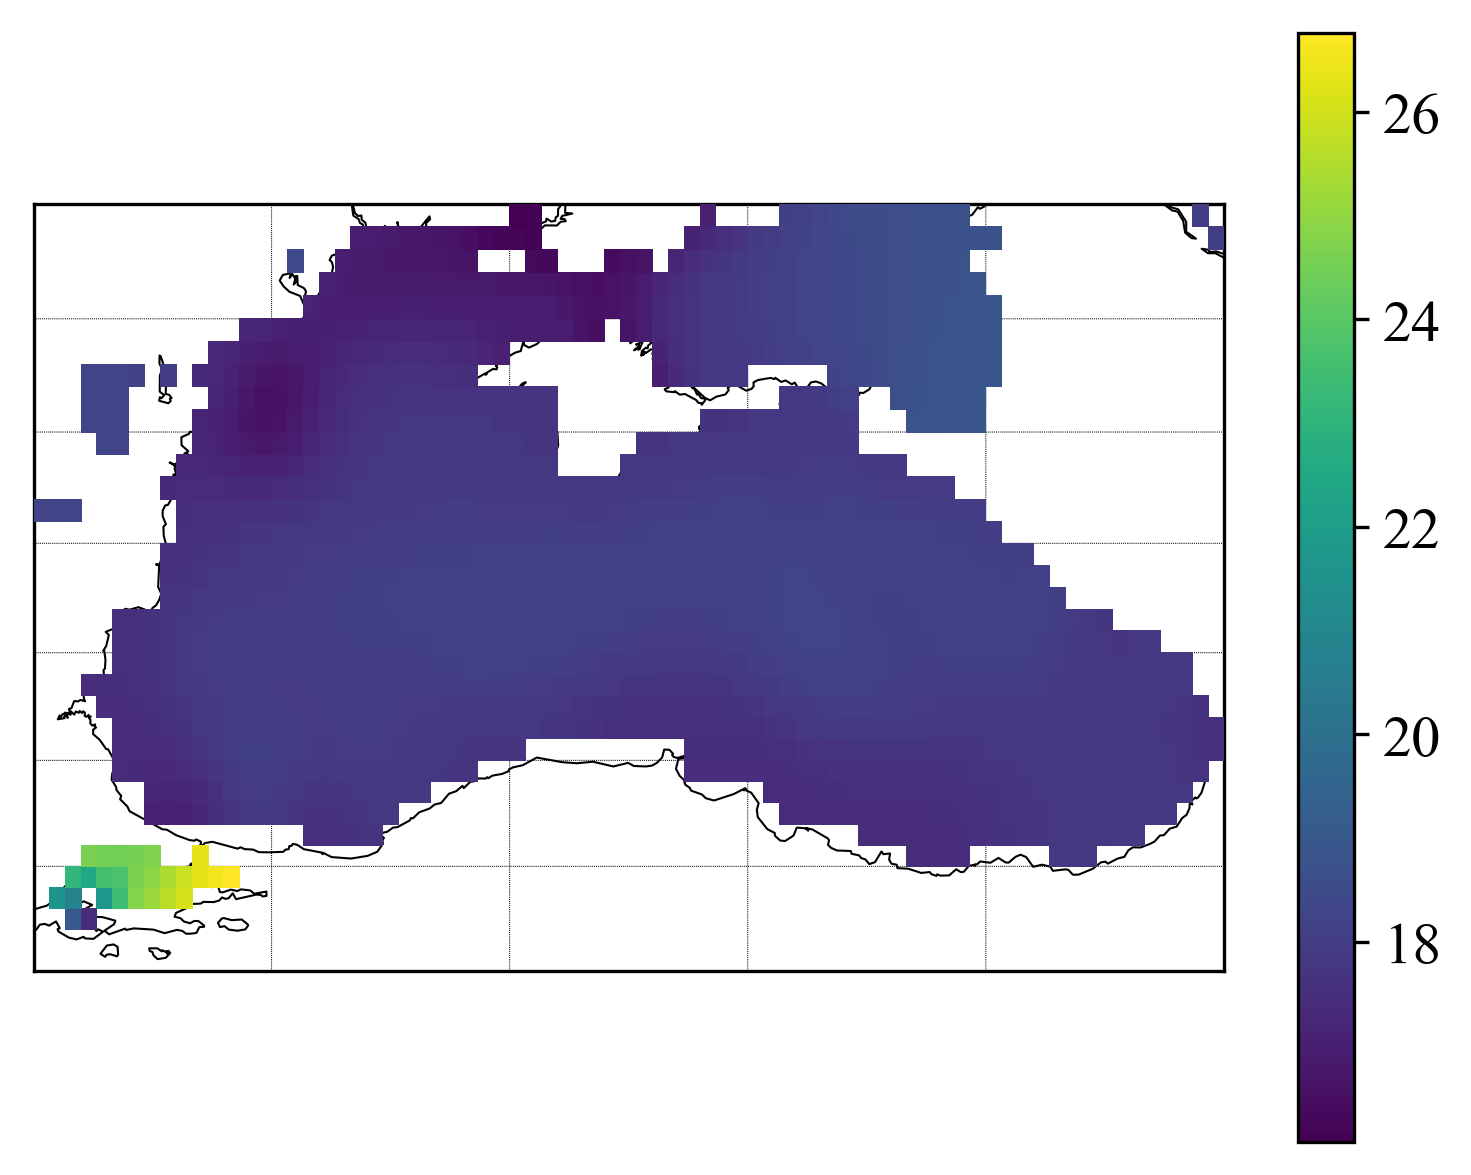

PyObject <matplotlib.colorbar.Colorbar object at 0x7f68340a4850>

In [22]:
x, y = map(longrid, latgrid)
map[:pcolormesh](x, y, transpose(salinityplot), zorder=3);
map[:drawcoastlines](linewidth=0.5);
# Draw lat/lon grid lines every 30 degrees.
map[:drawmeridians](collect(27:3:42), linewidth=.25)
map[:drawparallels](collect(40:1:48), linewidth=.25)
colorbar()